<a href="https://colab.research.google.com/github/allera484/lab-python-flow-control/blob/main/Copy_of_Quest_Shark_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Pandas

In [ ]:
import pandas as pd
import re

# 1. Download the dataset and import it into Python.

The Excel file location

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQYcqIfFpqno5bjwAg1H3HhRd29WHBKynhKfBAbAYqoN2qEkG_uMQSjqOgWwMEfdCFkDOpkeHDNHlDB/pub?output=csv"

Read the Excel file

In [ ]:
shark_df = pd.read_csv(url)
shark_df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,02 Dec-2023,2023.0,Unprovoked,MEXICO,Jalisco,San Patricio Melaque,Swimming,Maria Fernandez Martinez Jimenez,F,26,...,NaN,"News Channel 21, 12/3.2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30 Nov-2023,2023.0,Unprovoked,AUSTRALIA,Queensland,Clack Island,Swimming,male,M,21,...,1.8m bull shark,"ABC Net, 11/30/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21 Nov-2023,2023.0,Unprovoked,BAHAMAS,Grand Bahama Island,Tiger Beach,Scuba diving,female,F,47,...,NaN,"Eye Witness News, 11/22/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10 Nov-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Port Noarlunga,Free diving,Bridgette O’Shannessy,F,32,...,NaN,S. DeMarchi. GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05 Nov-2023,2023.0,Unprovoked,USA,Florida,"Juno Beach, Palm Beach County",Swimming,Steven Reinhardt,M,66,...,NaN,"ABC, 11/15/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Examine the data and try to understand what the fields mean before proceeding with data cleaning and manipulation.

Different types of data

In [ ]:
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6945 entries, 0 to 6944
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6920 non-null   object 
 1   Year            6918 non-null   float64
 2   Type            6902 non-null   object 
 3   Country         6870 non-null   object 
 4   State           6439 non-null   object 
 5   Location        6356 non-null   object 
 6   Activity        6335 non-null   object 
 7   Name            6701 non-null   object 
 8   Sex             6341 non-null   object 
 9   Age             3930 non-null   object 
 10  Injury          6885 non-null   object 
 11  Unnamed: 11     6359 non-null   object 
 12  Time            3398 non-null   object 
 13  Species         3794 non-null   object 
 14  Source          6901 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

1. Dates of Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[0]]

,Date
0,02 Dec-2023
1,30 Nov-2023
2,21 Nov-2023
3,10 Nov-2023
4,05 Nov-2023
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


2. Years of Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[1]]

,Year
0,2023.0
1,2023.0
2,2023.0
3,2023.0
4,2023.0
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


3. Types of Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[2]]

,Type
0,Unprovoked
1,Unprovoked
2,Unprovoked
3,Unprovoked
4,Unprovoked
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


4. Countrys of Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[3]]

,Country
0,MEXICO
1,AUSTRALIA
2,BAHAMAS
3,AUSTRALIA
4,USA
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


5. States of Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[4]]

,State
0,Jalisco
1,Queensland
2,Grand Bahama Island
3,South Australia
4,Florida
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


6. Location of Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[5]]

,Location
0,San Patricio Melaque
1,Clack Island
2,Tiger Beach
3,Port Noarlunga
4,"Juno Beach, Palm Beach County"
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


7. Activitys (before or during or after) Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[6]]

,Activity
0,Swimming
1,Swimming
2,Scuba diving
3,Free diving
4,Swimming
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


8. Names of victims due to Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[7]]

,Name
0,Maria Fernandez Martinez Jimenez
1,male
2,female
3,Bridgette O’Shannessy
4,Steven Reinhardt
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


9. Sex of the victiem of Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[8]]

,Sex
0,F
1,M
2,F
3,F
4,M
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


10. Age of the victiem of Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[9]]

,Age
0,26
1,21
2,47
3,32
4,66
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


11. Unnamed: 11

In [ ]:
shark_df.iloc[:,[10]]

,Injury
0,FATAL
1,Puncture wounds to right upper arm
2,FATAL
3,Injuries to scalp and face
4,Lacerations to right forearm
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


12. Time of Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[11]]

,Unnamed: 11
0,Y
1,N
2,Y
3,N
4,N
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


13. The species of Shark

In [ ]:
shark_df.iloc[:,[12]]

,Time
0,Morning
1,11h30
2,10h30
3,13h20
4,10h30
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


14. Source of the news of Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[13]]

,Species
0,NaN
1,1.8m bull shark
2,NaN
3,NaN
4,NaN
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


15. Pdf of more informations and Datas

In [ ]:
shark_df.iloc[:,[14]]

,Source
0,"News Channel 21, 12/3.2023"
1,"ABC Net, 11/30/2023"
2,"Eye Witness News, 11/22/2023"
3,S. DeMarchi. GSAF
4,"ABC, 11/15/2023"
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


16. Href formula

In [ ]:
shark_df.iloc[:,[15]]

,pdf
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


17. Href

In [ ]:
shark_df.iloc[:,[16]]

,href formula
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6940,http://sharkattackfile.net/spreadsheets/pdf_di...
6941,http://sharkattackfile.net/spreadsheets/pdf_di...
6942,http://sharkattackfile.net/spreadsheets/pdf_di...
6943,http://sharkattackfile.net/spreadsheets/pdf_di...


18. Case Number of Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[17]]

,href
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


19. Case Number.1 of Shark Attacks (Provoked or Unprovoked)

In [ ]:
shark_df.iloc[:,[18]]

,Case Number
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


20. The Original order

In [ ]:
shark_df.iloc[:,[19]]

,Case Number.1
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


21. Unnamed: 21

In [ ]:
shark_df.iloc[:,[20]]

,original order
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


22. Unnamed: 22

In [ ]:
shark_df.iloc[:,[21]]

,Unnamed: 21
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6940,NaN
6941,NaN
6942,NaN
6943,NaN


# 3. Analyze the structure and quality of a dataset, identify potential issues or problems, and develop a plan for cleaning and transforming the data.

## Question to ask for the necessary cleaning of data

### Hypotesis : "Shark attacks have increased over the years in specific regions."

1. What can I do with the 'Year', 'Country', 'State', 'Location', 'Activity', and 'Injury' columns?
2. Are people visiting places that are known to have a lot of sharks?
3. Could the injury's be prevented if the activities where different?
4. Are the activies a factor in Shark Attacks accidents?

### Statements

1. Create a Company whose purpose is to analyse the 'Country's', 'States' and 'Locations' where Shark Attacks happens frecuently.
By using the 'Years' and 'Activity's' of this Sharks Attacks as examples to help race public awarness of reduce the 'Injury's' that
could happen.

## Potential Issues or problems & Plans for cleaning and transforming the data

1. Remove rows that only contains NaN betweent all of this columns to see how many datas are incomplete.
2. Compare to see if the data can be taken from a similar row.

Remove the NaN from the columns to see until which Row we had to work with.

In [ ]:
Shark_Studie = shark_df.iloc[:,[1,3,4,5,6,10,18]].dropna()
Shark_Studie

,Year,Country,State,Location,Activity,Injury,Case Number
115,2022.0,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,FATAL,2022.09.25
118,2022.0,USA,Hawaii,"Lower Paia Beach Park, Maui",Swimming or Snorkeling,Injuries to left arm and right hand,2022.09.03
119,2022.0,AUSTRALIA,New South Wales,Avoca,Surfing,Puncture wounds to right hand & forearm,2022.08.31
120,2022.0,AUSTRALIA,New South Wales,Coffs Harbour,Kayaking,"No injury, kayak bitten in half",2022.08.17
121,2022.0,USA,South Carolina,"Myrtle Beach, Horry County",Swimming,Minor injury to leg,2022.08.15.c
...,...,...,...,...,...,...,...
6908,0.0,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,"FATAL, leg stripped of flesh",ND.0012
6914,0.0,AUSTRALIA,New South Wales,,Swimming,FATAL,ND.0006
6915,0.0,AUSTRALIA,Western Australia,Roebuck Bay,Diving,FATAL,ND.0005
6917,0.0,USA,North Carolina,Ocracoke Inlet,Swimming,FATAL,ND.0003


Change the 'Year' by the 'Case Number'

In [ ]:
def change_year(row):
  Case_number = row['Case Number']
  if row['Year'] == 0:
    return pd.NA
  elif 'BC' in Case_number:
    return int(re.search(r'(\d+)BC', Case_number).group(1))
  else:
    return int(row['Year'])

In [ ]:
Shark_Studie['Year'] = Shark_Studie.apply(change_year, axis=1)
Shark_Studie

,Year,Country,State,Location,Activity,Injury,Case Number
115,2022,SOUTH AFRICA,Western Cape Province,"Central Beach, Plettenberg Bay",Swimming,FATAL,2022.09.25
118,2022,USA,Hawaii,"Lower Paia Beach Park, Maui",Swimming or Snorkeling,Injuries to left arm and right hand,2022.09.03
119,2022,AUSTRALIA,New South Wales,Avoca,Surfing,Puncture wounds to right hand & forearm,2022.08.31
120,2022,AUSTRALIA,New South Wales,Coffs Harbour,Kayaking,"No injury, kayak bitten in half",2022.08.17
121,2022,USA,South Carolina,"Myrtle Beach, Horry County",Swimming,Minor injury to leg,2022.08.15.c
...,...,...,...,...,...,...,...
6908,NaN,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,"FATAL, leg stripped of flesh",ND.0012
6914,NaN,AUSTRALIA,New South Wales,,Swimming,FATAL,ND.0006
6915,NaN,AUSTRALIA,Western Australia,Roebuck Bay,Diving,FATAL,ND.0005
6917,NaN,USA,North Carolina,Ocracoke Inlet,Swimming,FATAL,ND.0003


Group by 'Year' and 'Attack Count"

<Axes: xlabel='Year'>

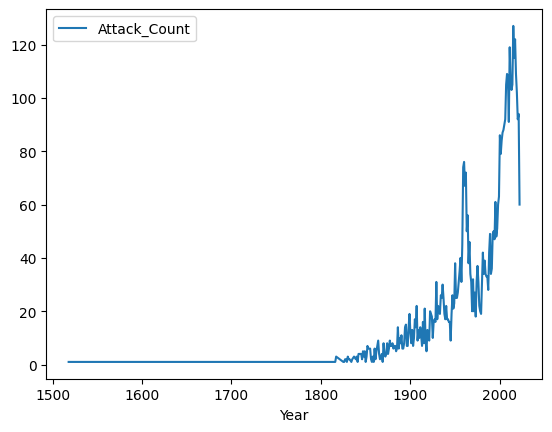

In [ ]:
Shark_Studie.groupby(['Year']).size().reset_index(name='Attack_Count').dropna().sort_values('Year').plot.line(x='Year', y='Attack_Count')

<Axes: xlabel='Year'>

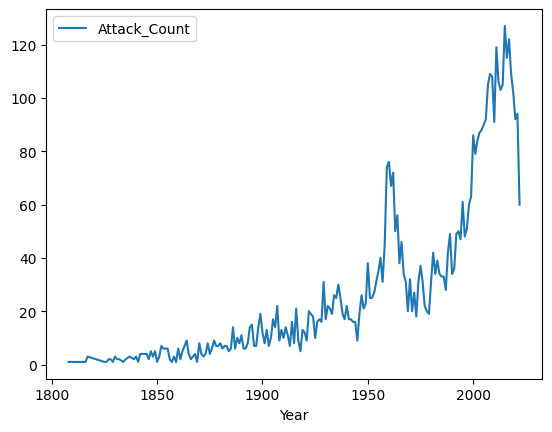

In [ ]:
Shark_Studie.query('Year > 1800').groupby(['Year']).size().reset_index(name='Attack_Count').dropna().sort_values('Year').plot.line(x='Year', y='Attack_Count')

Group by 'Year' and 'Country' to count the number of shark attacks per year and country

In [ ]:
# Attack of sharks by Country
Shark_Attacks = Shark_Studie.groupby(['Year', 'Country']).size().reset_index(name='Attack_Count')
# Attack of sharks by Country with different Injuries
Shark_Attacks_Injury = Shark_Studie.groupby(['Year', 'Country', 'Injury']).size().reset_index(name='Attack_Count')
Shark_Attacks

,Year,Country,Attack_Count
0,1518,MEXICO,1
1,1595,INDIA,1
2,1642,USA,1
3,1700,FRANCE,1
4,1703,BARBADOS,1
...,...,...,...
1390,2022,MEXICO,1
1391,2022,NEW ZEALAND,2
1392,2022,SOUTH AFRICA,3
1393,2022,THAILAND,1


Sort the Attacks to see the Years that had greater Attack Counts

In [ ]:
# Sorted Attack by the countries with greater numbers
Sorted_Attacks = Shark_Attacks.sort_values(by='Attack_Count', ascending=False, ignore_index=True).dropna()
# Sorted Attacks by Injuries in the countries
Sorted_Attacks_Injury = Shark_Attacks_Injury.sort_values(by='Attack_Count', ascending=False, ignore_index=True)
Sorted_Attacks

,Year,Country,Attack_Count
0,2015,USA,66
1,2007,USA,65
2,2012,USA,60
3,2016,USA,60
4,2014,USA,60
...,...,...,...
1390,1973,BAHAMAS,1
1391,1914,SAMOA,1
1392,1914,NEW CALEDONIA,1
1393,1973,PALAU,1


Results of the Countries with the highest attacks

In [ ]:
# Top Countries 5 countries that had Shark Attacks
Top_Countries = Sorted_Attacks.groupby('Country').sum().sort_values(by='Attack_Count', ascending=False).drop('Year', axis=1).head(5)
# Top Countries 5 countries that had Shark Attacks Injuries
Top_Countries_Injuries = Sorted_Attacks_Injury.groupby(['Country', 'Injury']).sum().sort_values(by='Attack_Count', ascending=False).drop('Year', axis=1).head(5)
Top_Countries

,Attack_Count
Country,
USA,2251
AUSTRALIA,1274
SOUTH AFRICA,534
NEW ZEALAND,129
BRAZIL,102


Verified how the Injuries are related to the Activities

In [ ]:
Activity_Injury = Shark_Studie.groupby('Activity')['Injury'].value_counts().reset_index(name='Injury_Count')
Activity_Injury.sort_values(by='Injury_Count', ascending=False, ignore_index=True)

,Activity,Injury,Injury_Count
0,Swimming,FATAL,175
1,Bathing,FATAL,49
2,Surfing,FATAL,41
3,Surfing,Foot bitten,36
4,Surfing,Left foot bitten,26
...,...,...,...
4497,Kayaking,"No injury, shark struck paddle",1
4498,Kayaking,Reported as shark attack but probable drowning,1
4499,Kayaking,Reported by media as shark attack but forensic...,1
4500,Kayaking,"Right arm bitten, defense wounds to left hand",1
